<a href="https://colab.research.google.com/github/ratan54/Animated-and-Story-Telling-plot-For-COVID-19-Data-set-Using-Python/blob/master/Big_Data_Individual_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading the data file**

In [2]:
from google.colab import files

uploaded = files.upload()


for fn in uploaded.keys():

  print('User uploaded file "{name}" with length {length} bytes'.format(

name=fn, length=len(uploaded[fn])))

Saving Covid Dataset.csv to Covid Dataset.csv
User uploaded file "Covid Dataset.csv" with length 405339 bytes


**Library for working with dataset**

In [3]:
import pandas as pd
import numpy as np
import os

**Library for data visualization**

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

**Machine learning algorithms**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree

**Importing dataset**

In [7]:
Covid19= pd.read_csv (r'/content/Covid Dataset.csv')

**Checking for the NA(Missing values) in the dataset**

In [8]:
Covid19.isna().sum()

Breathing Problem                          0
Fever                                      0
Dry Cough                                  0
Sore throat                                0
Running Nose                               0
Asthma                                     0
Chronic Lung Disease                       0
Headache                                   0
Heart Disease                              0
Diabetes                                   0
Hyper Tension                              0
Fatigue                                    0
Gastrointestinal                           0
Abroad travel                              0
Contact with COVID Patient                 0
Attended Large Gathering                   0
Visited Public Exposed Places              0
Family working in Public Exposed Places    0
Wearing Masks                              0
Sanitization from Market                   0
COVID-19                                   0
dtype: int64

With above we noticed that there are no missing values in our dataset

In [9]:
Covid19.describe(include='all')

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434,5434
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2
top,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,No,Yes
freq,3620,4273,4307,3953,2952,2920,2869,2736,2911,2846,2771,2821,2883,2983,2726,2924,2820,3172,5434,5434,4383


From above command we can see the variable counts as well as frequency of all dichotomous variables. In our dataset all variables are dichotomous.

In [10]:
Covid19.columns

Index(['Breathing Problem', 'Fever', 'Dry Cough', 'Sore throat',
       'Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Abroad travel', 'Contact with COVID Patient',
       'Attended Large Gathering', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market', 'COVID-19'],
      dtype='object')

**Dichotomous variable distribution**

In [11]:
Covid19[["Breathing Problem", "Fever", "Dry Cough", "Sore throat","Running Nose", "Asthma", "Chronic Lung Disease", "Headache","Heart Disease", "Diabetes", "Hyper Tension", "Fatigue ","Gastrointestinal ", "Abroad travel", "Contact with COVID Patient","Attended Large Gathering", "Visited Public Exposed Places","Family working in Public Exposed Places", "Wearing Masks","Sanitization from Market", "COVID-19"]].apply(lambda x: x.value_counts()).T.stack()

Breathing Problem                        No     1814.0
                                         Yes    3620.0
Fever                                    No     1161.0
                                         Yes    4273.0
Dry Cough                                No     1127.0
                                         Yes    4307.0
Sore throat                              No     1481.0
                                         Yes    3953.0
Running Nose                             No     2482.0
                                         Yes    2952.0
Asthma                                   No     2920.0
                                         Yes    2514.0
Chronic Lung Disease                     No     2869.0
                                         Yes    2565.0
Headache                                 No     2698.0
                                         Yes    2736.0
Heart Disease                            No     2911.0
                                         Yes    2523.0
Diabetes  

Above we can see the distribution of all variables. We can see from above that we have only one value for Wearing mask as well as for Sanitization from market. Due to this, this variables do not provide us any useful information. hence we will drop this 2 variables.

**Removing variables with no useful information**

In [12]:
Covid19=Covid19.drop('Wearing Masks',axis=1)
Covid19=Covid19.drop('Sanitization from Market',axis=1)

In [13]:
Covid19

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No


In [14]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [15]:
Covid19['Breathing Problem']=e.fit_transform(Covid19['Breathing Problem'])
Covid19['Fever']=e.fit_transform(Covid19['Fever'])
Covid19['Dry Cough']=e.fit_transform(Covid19['Dry Cough'])
Covid19['Sore throat']=e.fit_transform(Covid19['Sore throat'])
Covid19['Running Nose']=e.fit_transform(Covid19['Running Nose'])
Covid19['Asthma']=e.fit_transform(Covid19['Asthma'])
Covid19['Chronic Lung Disease']=e.fit_transform(Covid19['Chronic Lung Disease'])
Covid19['Headache']=e.fit_transform(Covid19['Headache'])
Covid19['Heart Disease']=e.fit_transform(Covid19['Heart Disease'])
Covid19['Diabetes']=e.fit_transform(Covid19['Diabetes'])
Covid19['Hyper Tension']=e.fit_transform(Covid19['Hyper Tension'])
Covid19['Abroad travel']=e.fit_transform(Covid19['Abroad travel'])
Covid19['Contact with COVID Patient']=e.fit_transform(Covid19['Contact with COVID Patient'])
Covid19['Attended Large Gathering']=e.fit_transform(Covid19['Attended Large Gathering'])
Covid19['Visited Public Exposed Places']=e.fit_transform(Covid19['Visited Public Exposed Places'])
Covid19['Family working in Public Exposed Places']=e.fit_transform(Covid19['Family working in Public Exposed Places'])
Covid19['COVID-19']=e.fit_transform(Covid19['COVID-19'])
Covid19['Gastrointestinal ']=e.fit_transform(Covid19['Gastrointestinal '])
Covid19['Fatigue ']=e.fit_transform(Covid19['Fatigue '])

In [16]:
corr=Covid19.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


**Data Visualization**

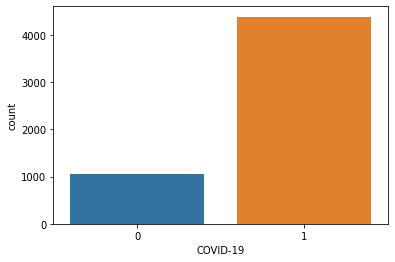

In [18]:
sns.countplot(x='COVID-19',data=Covid19)

With help seaborn library we can visualize distribution of population those who got Covid and those who didn't.

In [ ]:
def pie_chart(Covid19, col, labels):
    data = Covid19[col].value_counts().to_numpy()
    def absolute_value(val):
        a  = np.round(val / 100 * data.sum(), 0)
        return str('%0.0f' % a) + '\n(' + ('%0.2f' % val) + '%)'
    plt.pie(data, labels = labels, autopct=absolute_value)
    plt.legend(title=col)
    plt.show() 

pie_chart(Covid19, 'Breathing Problem', [1, 0])
pie_chart(Covid19, 'Fever', [1, 0])
pie_chart(Covid19,'Dry Cough',[1, 0])
